# 9. Coverage ratio between homeologus contig pairs
## 9.1 Determine homologue sets of homeologue contig pairs
based on ortology cluster contents
### 9.1.1 Make a dictionary where genes are keys and their contigs are values, for each species

In [2]:
from BCBio import GFF
from Bio import SeqIO
import pickle

gffs = {'W1': './annotation/mincognita.augustus.gff3',
        'VW4': './annotation/mjavanicaVW4.augustus.gff3',
        'Mare': './annotation/marenaria.augustus.gff3'}

genes_to_contig = {}

for sp in gffs:

    genes_to_contig[sp] = {}
    
    limit_info = dict(
            gff_type = ["gene","intron"])

    in_handle = open(gffs[sp])
    gff_records = list(GFF.parse(in_handle, limit_info=limit_info))
    in_handle.close()
    
    for r in gff_records:
        for f in r.features:
            if 'ID' in f.qualifiers: 
                ID = f.qualifiers['ID'][0].split('.')[0]
                if ID in genes_to_contig[sp]:
                    continue
                genes_to_contig[sp][ID] = r.id


with open('genes_to_contigs.pkl','wt') as hndl:
    pickle.dump(genes_to_contig,hndl)

genes_to_contig

{'Mare': {'g16981': 'scaffold13241_cov60',
  'g16980': 'scaffold13240_cov49',
  'g16983': 'scaffold13242_cov94',
  'g16982': 'scaffold13241_cov60',
  'g16985': 'scaffold13242_cov94',
  'g16984': 'scaffold13242_cov94',
  'g16987': 'scaffold13243_cov49',
  'g16986': 'scaffold13242_cov94',
  'g16989': 'scaffold13244_cov62',
  'g16988': 'scaffold13244_cov62',
  'g21716': 'scaffold22301_cov147',
  'g21717': 'scaffold22303_cov48',
  'g21714': 'scaffold22299_cov102',
  'g21715': 'scaffold22301_cov147',
  'g21712': 'scaffold22296_cov58',
  'g21713': 'scaffold22296_cov58',
  'g21710': 'scaffold22296_cov58',
  'g21711': 'scaffold22296_cov58',
  'g21718': 'scaffold22305_cov63',
  'g21719': 'scaffold22308_cov63',
  'g21768': 'scaffold22456_cov101',
  'g15184': 'scaffold10944_cov157',
  'g15185': 'scaffold10944_cov157',
  'g15186': 'scaffold10945_cov92',
  'g15187': 'scaffold10947_cov65',
  'g15180': 'scaffold10939_cov60',
  'g15181': 'scaffold10939_cov60',
  'g15182': 'scaffold10939_cov60',
  'g15

### 9.1.2 Make a dictionary in which the keys are OGs and the values are a set of contigs the OG occurs on, for each species

In [5]:
import glob
from Bio import SeqIO

OG_contig_relationship = {}

for f in glob.glob('./orthofinder/all_inputs/Results_Mar21/4samples_alns/*'):
    og = f.split('/')[-1].split('.')[0]
    OG_contig_relationship[og] = {}
    records = SeqIO.parse(f,'fasta')
    for r in records:
        sp = r.id.split('_')[0]
        if 'Ment' in sp or 'Mflo' in sp:
            continue
        ID = r.description.split()[1].partition('_')[-1].rpartition('_')[0]
        try:
            OG_contig_relationship[og][sp].add(genes_to_contig[sp][ID])
        except:
            OG_contig_relationship[og][sp] = {genes_to_contig[sp][ID]}
            
with open('OG_contig_relationship.pkl','wt') as hndl:
    pickle.dump(OG_contig_relationship,hndl)

OG_contig_relationship

{'OG0000478': {'Mare': {'scaffold6018_cov72', 'scaffold7261_cov132'},
  'VW4': {'scaffold2058_cov324', 'scaffold6925_cov364'},
  'W1': {'scaffold3122_cov145', 'scaffold3123_cov67'}},
 'OG0000647': {'Mare': {'scaffold1082_cov61', 'scaffold8217_cov58'},
  'VW4': {'scaffold1032_cov163', 'scaffold8707_cov275'},
  'W1': {'scaffold4585_cov69', 'scaffold4589_cov98'}},
 'OG0000648': {'Mare': {'scaffold1085_cov53', 'scaffold4742_cov75'},
  'VW4': {'scaffold5414_cov176'},
  'W1': {'scaffold11037_cov64', 'scaffold24781_cov141'}},
 'OG0000687': {'Mare': {'scaffold3320_cov61'},
  'VW4': {'scaffold3726_cov220', 'scaffold43864_cov305'},
  'W1': {'scaffold352_cov73', 'scaffold5036_cov115'}},
 'OG0000830': {'Mare': {'scaffold28521_cov53', 'scaffold5310_cov60'},
  'VW4': {'scaffold2338_cov238', 'scaffold2516_cov204'},
  'W1': {'scaffold16609_cov69', 'scaffold52798_cov134'}},
 'OG0000864': {'Mare': {'scaffold32611_cov78', 'scaffold7110_cov91'},
  'VW4': {'scaffold2940_cov284', 'scaffold6362_cov299'},
  '

### 9.1.3 Make a fasta file with the contigs from the contig pairs for each species

In [ ]:
import misc

misc.makedir('contig_pairs_data')

base = 'assemblies'

assemblies = {'W1': SeqIO.to_dict(SeqIO.parse('%s/mincognita_gapClosed.fa'%base,'fasta')),
              'VW4': SeqIO.to_dict(SeqIO.parse('%s/mjavanica_gapClosed.fa'%base,'fasta')),
              'Mare': SeqIO.to_dict(SeqIO.parse('%s/HarA_gapClosed.fa'%base,'fasta'))
             }

contigs = {'Mare':set(),'W1':set(),'VW4':set()}

per_species_contig_pairs = {'Mare':set(),'W1':set(),'VW4':set()}

for og in  OG_contig_relationship:
    if all([len(OG_contig_relationship[og][sp]) == 2 for sp in ['Mare','W1','VW4']]):
        for sp in ['Mare','W1','VW4']:
            contigs[sp] |= OG_contig_relationship[og][sp]
            per_species_contig_pairs[sp].add('~'.join(sorted(list(OG_contig_relationship[og][sp]))))

for sp in ['Mare','W1','VW4']:
    with open('contig_pairs_data/%s.fasta'%sp,'wt') as hndl:
        for c in contigs[sp]:
            hndl.write(assemblies[sp][c].format('fasta'))
            
with open('per_species_contig_pairs.pkl','wt') as hndl:
    pickle.dump(per_species_contig_pairs,hndl)

In [6]:
from Bio import SeqIO

print 'Number of contigs in each contig pair sample'

for sp in ['Mare','W1','VW4']:
    print sp, len(list(SeqIO.parse('contig_pairs_data/%s.fasta'%sp,'fasta')))
    
print 'Number of OGs with a pair in all species'

OGs = 0

for OG in OG_contig_relationship:
    if all([len(OG_contig_relationship[OG][sp]) > 1 for sp in ['Mare','W1','VW4']]):
        OGs += 1
print OGs

Number of contigs in each contig pair sample
Mare 767
W1 726
VW4 748
Number of OGs with a pair in all species
420


## 9.2 Map reads to the contigs that are in contig pairs
### 9.2.1 Choose reference and maximum mismatch for the mapping

In [ ]:
import misc

smpl2ref = {
    'MjavVW5' :['VW4', 2],
    'MareL28' :['Mare',5],
    'MincA14' :['W1',  2],
    'MincL17' :['VW4', 2],
    'MincL27' :['W1',  2],
    'MincL15' :['VW4', 2],
    'MjavL57' :['VW4', 2],
    'MincVW6' :['W1',  2],
    'MincL9'  :['W1',  2],
    'Minc557R':['W1',  2],
    'MincL19' :['W1',  2],
    'MareL32' :['Mare',5],
    'MincHarC':['W1',  2],
    'MjavVW4' :['VW4', 2],
    'MareHarA':['Mare',2],
    'MincW1'  :['W1',  2]
}

### 9.2.2 Compute the read coverage for contigs that are in contig pairs
#### 9.2.2.1 Command line templates

In [ ]:
import misc

# cd to the sample's directory, do the work and leave
cdcline = "cd %s && %s && cd .." #%(bwadir, cline)

# Index the reference contigs
indexcline = "bwa index %s"#%(ref)

# Align reads to contigs
aligncline = "bwa aln -n %i %s %s > %s%i.sai"#%(mismatch, ref, readpool, smpl, end)

# Write and assembly sam file
sampecline = "bwa sampe %s %s1.sai %s2.sai %s %s > %s.sam"#%(ref, smpl, smpl, readpool1, readpool2, smpl)

# Sort the reads based on their mapped position
sortcline  = "samtools sort -o %s.bam -T %s -@ 1 -O bam %s.sam" #%(smpl,smpl,smpl) 

# Call SNPs not required here, for future reference
fbayescline= "freebayes -f %s -p 2 %s.bam > %s.vcf" #%(ref, smpl, smpl)

#### 9.2.2.2 Run mapping workflow

In [ ]:
import glob, os, misc

# The paths assume we moved to a subdirectory of cwd
ref = "../contig_pairs_data/%s.fasta" # reference contig pairs
bwadir = "./%s_contig_pairs_bwa/"     # workdir for a given sample

def run_map_assembly(smpl, smpl2ref):
    workdir = bwadir%smpl
    current_ref = ref%smpl2ref[smpl][0]
    current_mismatch = smpl2ref[smpl][1]
    readpool_template = 'raw_reads/'+smpl+"_%i_trimmomatic.fastq.gz"
    readpool1 = readpool_template%1
    readpool2 = readpool_template%2
    misc.makedir(workdir)
    clines = [
        indexcline%current_ref,
        aligncline%(current_mismatch, current_ref, readpool1, smpl, 1),
        aligncline%(current_mismatch, current_ref, readpool2, smpl, 2),
        sampecline%(current_ref, smpl, smpl, readpool1, readpool2, smpl),
        sortcline%(smpl,smpl,smpl),
        fbayescline%(current_ref,smpl,smpl)
    ]
    
    for cline in clines:
        out, err = misc.execute_cline(cdcline%(workdir, cline))
        print out
        print err

def run_parallel_map_assmbly(samples):
    
    """ This will run run_map_assembly 
    for all the samples in parallel"""
    
    import threading
    import os

    # This portion will run the mapping and snp calling
    class MyThread(threading.Thread):
        def __init__(self, smpl, smpl2ref):
            threading.Thread.__init__(self)
            self.smpl = smpl
            self.smpl2ref = smpl2ref

        def run(self):
            run_map_assembly(self.smpl, self.smpl2ref)
            
    threads = [MyThread(smpl, smpl2ref) for smpl in samples]

    for t in threads:
        t.start()

    for t in threads:
        t.join()
        
    for f in glob.glob('*_contig_pairs_bwa/*.sa*'):
        os.remove(f)
    
    # This portion will compute coverage files
    for smpl in samples:
        f = '%s_contig_pairs_bwa/%s.bam'%(smpl, smpl)
        cline = "samtools depth -aa %s > %s.cov"%(f,f)
        misc.execute_cline(cline)
        misc.compressgz("%s.cov"%f)
        os.remove(f)

# Filter out samples that were already completed
keys = list(smpl2ref.keys())
done_samples = [f.split('_')[0] for f in glob.glob('*_contig_pairs_bwa')]
keys = [i for i in keys if not i in done_samples]

# Run everything three samples at a time
# becuase temp files are very large
for samples in [keys[i:i+3] for i in range(0, len(keys), 3)]:
    run_parallel_map_assmbly(samples)

## 9.3 Align the coverage values of two contigs that are a homeologue pair

In [ ]:
def mafft_align_contigs(fpath):
    
    # Align a pair of sequence in a fasta file
    # return an AlignIO alignment instance
    
    from Bio import AlignIO
    import subprocess
    from Bio.Align.Applications import MafftCommandline
    import warnings
    
    # Align the sequences
    mafft_cline = MafftCommandline(input=fpath, op=3.0, retree=1)
    child = subprocess.Popen(str(mafft_cline),
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE,
                             shell=True)
    
    align = AlignIO.read(child.stdout, "fasta")
    
    if len(align[0].seq) == str(align[0].seq).count('-'):
        warnings.warn('bad alignment pair %s'%input)

    if len(align[1].seq) == str(align[1].seq).count('-'):
        warnings.warn('bad alignment pair %s'%input)
    
    return align

                
def get_aln_cumulative_entropy(align, char_type = 'dna'):
    # get cumulative entropy for the alignment
    # this helps to choose the right orientation
    # of the sequence in the alignment
    from reprophylo import entropy

    entropies =[]
    for i in range(align.get_alignment_length()):
        column = align[:,i]
        entropies.append(entropy(column, char_type))
    cum_entropy = sum(entropies) 
    return cum_entropy

def reorient_contigs(infpath, outfpath):
    
    # produce a fasta file where the top sequence is a reverse
    # complement of itself. This is done to check the cumulative
    # entropy again and descide which is the correct orientation
    
    from Bio import SeqIO
    
    records = list(SeqIO.parse(infpath, 'fasta'))
    a = records[0].seq
    records[0].seq = records[0].seq.reverse_complement()
    b = records[0].seq

    if str(records[0].seq).count('-') == len(records[0].seq):
        raise RuntimeError('bad revcomp %s'%pair)

    SeqIO.write(records,outfpath,'fasta')
    
def get_oriented_alignment(fasta_file_name):
    
    # Get a fasta file and produce an alignment 
    # object with a correct orientation
    
    top_revcomp = False
    
    align = mafft_align_contigs(fasta_file_name)
    
    
    # get cumulative entropy for alignment
    
    cum_entropy = get_aln_cumulative_entropy(align, char_type = 'dna') 
    
    # Align again 
    # with the top sequences revcomp
    
    reorient_contigs(fasta_file_name, 'revcomptemp_'+fasta_file_name) 
    
    align_topRevComp = mafft_align_contigs('revcomptemp_'+fasta_file_name)
    
    # get cumulative entropy for top seq rev comp alignment
    revcomp_cum_entropy = get_aln_cumulative_entropy(align_topRevComp, char_type = 'dna') 

    # Decide which alignment in better
    if cum_entropy > revcomp_cum_entropy:
        align = align_topRevComp
        top_revcomp = True

    return align, top_revcomp


def parse_cov_file(coverage_file_name):
    
    # BWA coverage file
    
    coverages = {}
    with open(coverage_file_name,'r') as lines:
        for line in lines:
            try:
                coverages[line.split()[0]].append(line.rstrip().split('\t')[-1])
            except:
                coverages[line.split()[0]] = [line.rstrip().split('\t')[-1]]
    return coverages
    
def align_coverage_to_its_sequence(record, ungapped_coverage):
    
    # add none to the coverages list where there is a gap in 
    # the aligned contig sequence
    
    aligned_coverage = []
    sequence = str(record.seq)
    c = None

    for i in range(len(sequence)):
        if not sequence[i] == '-':
            c = ungapped_coverage.pop(0)
            aligned_coverage.append(c)
        else:
            aligned_coverage.append(None)
            
    return aligned_coverage

def get_aligned_coverages(align,
                          coverages,
                          top_revcomp):
    
    # reorient the coverages of the top contig if
    # it is a rev comp, and add the gaps as None to
    # the coverage lists of both contigs in the pair
    
    from Bio import SeqIO
    import os

    aligned_coverages = {}
           
    len_aln = align.get_alignment_length()
    half_len_aln = len_aln/2

    for record in align:

        coverage_id = record.id
        aligned_coverages[coverage_id] = []
        ungapped_coverage = coverages[coverage_id]

         # reverse the top coverage if top revcomp
        if top_revcomp and record.id == align[0].id:
            ungapped_coverage = ungapped_coverage[::-1]
        aligned_coverages[coverage_id] = align_coverage_to_its_sequence(record, ungapped_coverage)


    top_cov_id = align[0].id
    bot_cov_id = align[1].id

    return aligned_coverages

## 9.4 Calculate coverage ratios for the contig pairs

In [ ]:
import misc, os, sys, pickle
import numpy as np
from Bio import SeqIO, AlignIO

misc.makedir('coverage_ratio_histograms')


def calc_ratios(smpl, smpl2ref):
    
    print smpl
    
    median_coverage_ratios = []
    triploid_pairs = []
    
    ref_contigs = SeqIO.to_dict(SeqIO.parse('./contig_pairs_data/%s.fasta'%smpl2ref[smpl][0],'fasta'))
    
    covgz = './%s_contig_pairs_bwa/%s.bam.cov.gz'%(smpl,smpl)
    cov = './%s_contig_pairs_bwa/%s.bam.cov'%(smpl,smpl)
    misc.extractgz(covgz, cov)
    coverages = parse_cov_file(cov)
    
    pairs = per_species_contig_pairs[smpl2ref[smpl][0]]
    
    for pair in pairs:
        
        #print pair
        
        contig_ids = pair.split('~')
        contig_records = [ref_contigs[i] for i in contig_ids]
        
        SeqIO.write(contig_records, '%s_temp_contig_pair.fasta'%smpl, 'fasta')
        
        align, top_revcomp = get_oriented_alignment('%s_temp_contig_pair.fasta'%smpl)
        
        
        try:
            aligned_coverages = get_aligned_coverages(align, coverages, top_revcomp)  
        except:
            coverages = parse_cov_file(cov)
            aligned_coverages = get_aligned_coverages(align, coverages, top_revcomp)
            
        alignment_description = ''
        
        for i in range(align.get_alignment_length()):
            pos = align[:,i]
            if '-' in pos:
                alignment_description += '-'
            elif pos[0] == pos[1]:
                alignment_description += 'I'
            else:
                alignment_description += 'M'
        
        coverA = []
        coverB = []
        
        for i in range(align.get_alignment_length()):
            if aligned_coverages[contig_ids[0]][i] and aligned_coverages[contig_ids[1]][i]:
                sub_description = alignment_description[i:i+100]
                gaps = sub_description.count('-')
                
                if gaps > 0:
                    continue
                
                identities = sub_description.count('I')
                prop_identity = identities/float(len(sub_description))
                
                if not 0.95 >= prop_identity >= 0.5:
                    continue
                
                coverA.append(int(aligned_coverages[contig_ids[0]][i]))
                coverB.append(int(aligned_coverages[contig_ids[1]][i]))
        
        invert = False
        if np.median(coverA) < np.median(coverB):
            coverA, coverB = coverB, coverA
            invert = True
            
        ratios = []
        
        for i in range(len(coverA)):
            if coverB[i] > 0:
                ratios.append(coverA[i]/float(coverB[i]))
                
                
        median_coverage_ratios.append(np.median(ratios))
        if 1.5 < np.median(ratios) < 2.5:
            if invert:
                contig_ids = contig_ids[::-1]
            triploid_pairs.append(contig_ids)    
        
        os.remove('%s_temp_contig_pair.fasta'%smpl)
        #print 
        sys.stdout.flush()
    os.remove(cov)
    
    with open('coverage_ratio_histograms/%s.pkl'%smpl,'wb') as hndl:
        pickle.dump(median_coverage_ratios,hndl)
    with open('coverage_ratio_histograms/triploid_pairs_%s.pkl'%smpl,'wb') as hndl:
        pickle.dump(triploid_pairs,hndl)
        
def run_parallel_ratio(smpl2ref):
    
    
    import threading
    import os
     
    class MyThread(threading.Thread):
        def __init__(self, smpl, smpldict):
            threading.Thread.__init__(self)
            self.smpl = smpl
            self.smpl2ref = smpldict

        def run(self):
            calc_ratios(self.smpl, self.smpl2ref)
            
    threads = [MyThread(smpl, smpl2ref) for smpl in smpl2ref.keys()]

    for t in threads:
        t.start()

    for t in threads:
        t.join()
        
        
run_parallel_ratio(smpl2ref)

## 9.5 Plot

M. incognita 557R
Residual error when fitting 1 Gaussians: 191.087580038
Residual error when fitting 2 Gaussians: 138.003462297
M. javanica L57
Residual error when fitting 1 Gaussians: 210.253299404
Residual error when fitting 2 Gaussians: 158.906456917
M. arenaria HarA
Residual error when fitting 1 Gaussians: 146.659384034
Residual error when fitting 2 Gaussians: 130.432104261


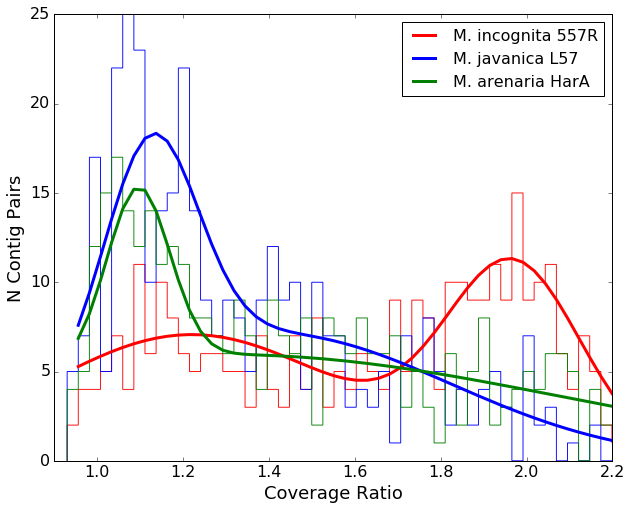

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import glob
import numpy as np
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import optimize

def gaussian(x, height, center, width, offset=0):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset=0):
    return three_gaussians(x, h1, c1, w1, h2, c2, w2, 0,0,1, offset)


errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

guesses={'557R':[None,[17.0,2.0,0.2],[10.5,1.1,0.2,17.0,2.0,0.1]],
        'MjavL57':[None,[25.0,1.0,0.2],[25.0,1.0,0.2, 6.0,2.0,0.1]],
        'HarA':[None,[17.0,1.0,0.2],[17.0,1.0,0.1, 6.0,2.0,0.2]]}


fig, ax = plt.subplots(figsize=(10,8))
bins = []

for f in glob.glob('./coverage_ratio_histograms/*.pkl'):
    smpl = f.split('/')[-1].split('.')[0]
    
    if not smpl in ('557R', 'MjavL57', 'HarA'):
        continue

    color = 'red'
    if any([i in smpl for i in ['HarA', 'Mare']]):
        color = 'green'
    elif any([i in smpl for i in ['Mjav', 'MincL15','MincL17']]):
        color = 'blue'

    d = pickle.load(open(f,'rb'))
    d = [i for i in d if i > 0]
    
    label = smpl.replace('557R', 'M. incognita 557R')
    label = label.replace('MjavL57', 'M. javanica L57')
    label = label.replace('HarA', 'M. arenaria HarA')
    
    
    # draw histograms   

    if len(bins)==0 :
        a = plt.hist(d, bins=1000,
             color= color,
             histtype='step',
             linewidth=0.9)
        bins = a[1]
    else:
        a = plt.hist(d, bins=bins,
             color= color,
             histtype='step',
             linewidth=0.9)

    values, bins = np.histogram(d, bins=bins)

    # draw gaussians

    optim1, success = optimize.leastsq(errfunc1, guesses[smpl][1][:], args=(bins[1:], values))
    optim2, success = optimize.leastsq(errfunc2, guesses[smpl][2][:], args=(bins[1:], values))
    plt.plot(bins[1:], two_gaussians(bins[1:], *optim2), c=color, ls='-', label=label, lw=3)
    #plt.plot(bins[1:], gaussian(bins[1:], *optim1), c=color, ls=':', label="fit 1")
    
    err1 = np.sqrt(errfunc1(optim1, bins[1:], values)).sum()
    err2 = np.sqrt(errfunc2(optim2, bins[1:], values)).sum()
    print label
    print('Residual error when fitting 1 Gaussians: {}\n'
          'Residual error when fitting 2 Gaussians: {}'.format(err1, err2))
    


    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
      
ax.set_xlim(0.9,2.2)
#ax.set_ylim(0,100)
ax.legend(prop={'size': 16})
plt.xlabel('Coverage Ratio', fontsize=18)
plt.ylabel('N Contig Pairs', fontsize=18)
plt.savefig('coverage_ratio_histograms/median_hist_with_best_gaus_fit.png', dpi=300)